In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
inp0 = pd.read_csv("IMDb Movies India.csv", encoding= "latin-1")

In [3]:
inp0

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
inp0.shape

(15509, 10)

In [5]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [6]:
inp0.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [7]:
inp0.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

<Axes: >

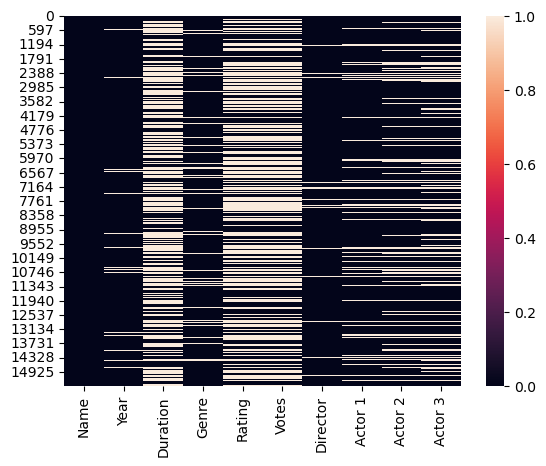

In [8]:
sns.heatmap(inp0.isnull())

In [9]:
missing_value = inp0.isnull().sum().sort_values(ascending = True)
missing_percentage = (round(inp0.isnull().sum()/inp0.isnull().count(),4)*100).sort_values(ascending = False)
missing_data = pd.concat([missing_value,missing_percentage],
                         axis = 1 ,keys=["missing_value","missing_percentage"])

In [10]:
missing_data

,missing_value,missing_percentage
Name,0,0.00
Director,525,3.39
Year,528,3.40
Actor 1,1617,10.43
Genre,1877,12.10
Actor 2,2384,15.37
Actor 3,3144,20.27
Votes,7589,48.93
Rating,7590,48.94
Duration,8269,53.32


In [11]:
inp0.dropna(subset=["Rating"],inplace=True)

In [12]:
 (round(inp0.isnull().sum()/inp0.isnull().count(),4)*100).sort_values(ascending = False)

Duration    26.11
Actor 3      3.69
Actor 2      2.53
Actor 1      1.58
Genre        1.29
Director     0.06
Name         0.00
Year         0.00
Rating       0.00
Votes        0.00
dtype: float64

In [13]:
inp0.dropna(subset=["Director","Actor 1" ,"Actor 2","Actor 3","Genre"],inplace=True)

In [14]:
 (round(inp0.isnull().sum()/inp0.isnull().count(),4)*100).sort_values(ascending = False)

Duration    25.13
Name         0.00
Year         0.00
Genre        0.00
Rating       0.00
Votes        0.00
Director     0.00
Actor 1      0.00
Actor 2      0.00
Actor 3      0.00
dtype: float64

In [15]:
inp0["Duration"] = pd.to_numeric(inp0["Duration"].str.strip(' min'))


In [16]:
inp0["Duration"].fillna(inp0["Duration"].mean(),inplace =True)

In [17]:
inp0.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [18]:
inp0.drop_duplicates(inplace=True)
inp0.shape

(7558, 10)

In [19]:
inp0['Year'] = inp0['Year'].apply(lambda x: x.split(')')[0])

year_lst = []
for val in inp0['Year']:
    if len(val.split('(')) == 1:
        year_lst.append(val.split('(')[0])
    elif len(val.split('(')) > 1:
        year_lst.append(val.split('(')[1])
inp0['Year'] = year_lst

In [20]:
inp0["Year"]  = inp0["Year"].astype(int)
inp0["Votes"] = inp0["Votes"].str.replace(',','').astype(int)

In [21]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7558 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7558 non-null   object 
 1   Year      7558 non-null   int32  
 2   Duration  7558 non-null   float64
 3   Genre     7558 non-null   object 
 4   Rating    7558 non-null   float64
 5   Votes     7558 non-null   int32  
 6   Director  7558 non-null   object 
 7   Actor 1   7558 non-null   object 
 8   Actor 2   7558 non-null   object 
 9   Actor 3   7558 non-null   object 
dtypes: float64(2), int32(2), object(6)
memory usage: 590.5+ KB


In [22]:
(inp0["Duration"] >180).sum()

113

In [24]:
(inp0["Duration"] <60).sum()

27

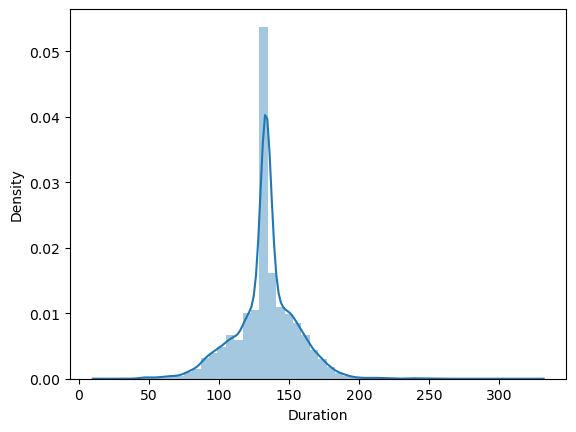

In [25]:
sns.distplot(inp0["Duration"])
plt.show()

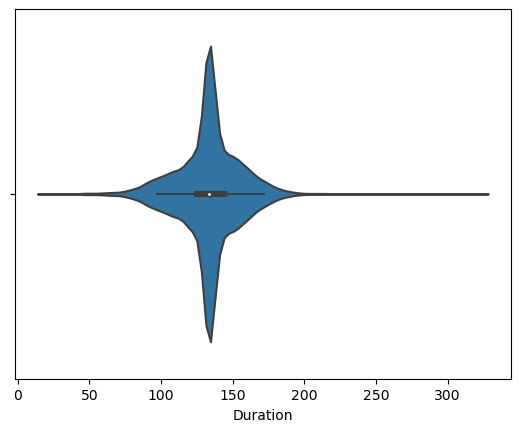

In [26]:
sns.violinplot(data= inp0 ,x="Duration")
plt.show()

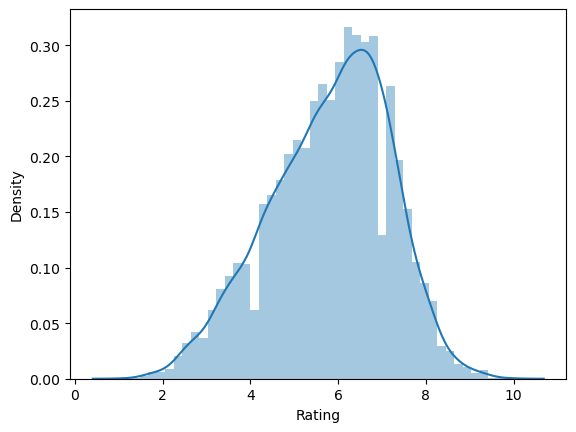

In [27]:
sns.distplot(inp0["Rating"])
plt.show()

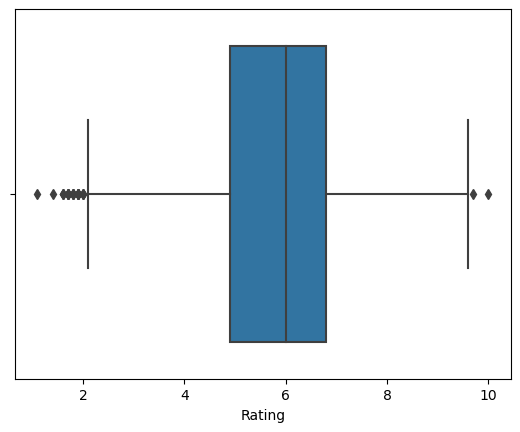

In [28]:
sns.boxplot(data= inp0 , x="Rating")
plt.show()

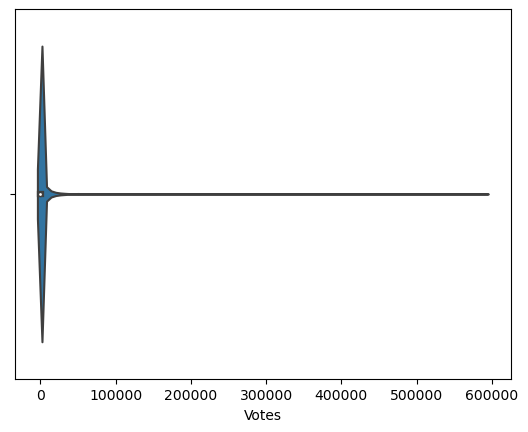

In [29]:
sns.violinplot(data=inp0 , x="Votes")
plt.show()

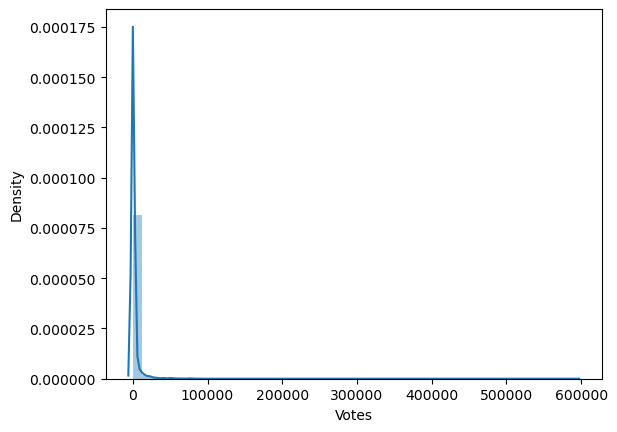

In [30]:
sns.distplot(inp0["Votes"])
plt.show()

In [31]:
inp0[inp0["Votes"]>100000]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
75,3 Idiots,2009,170.0,"Comedy, Drama",8.4,357889,Rajkumar Hirani,Aamir Khan,Madhavan,Mona Singh
3410,Dangal,2016,161.0,"Action, Biography, Drama",8.4,165074,Nitesh Tiwari,Aamir Khan,Sakshi Tanwar,Fatima Sana Shaikh
3829,Dil Bechara,2020,101.0,"Comedy, Drama, Romance",6.6,117377,Mukesh Chhabra,Sushant Singh Rajput,Sanjana Sanghi,Sahil Vaid
4848,Gandhi,1982,191.0,"Biography, Drama, History",8.0,220118,Richard Attenborough,Ben Kingsley,John Gielgud,Rohini Hattangadi
8035,Lagaan: Once Upon a Time in India,2001,224.0,"Drama, Musical, Sport",8.1,107234,Ashutosh Gowariker,Aamir Khan,Raghuvir Yadav,Gracy Singh
8219,Life of Pi,2012,127.0,"Adventure, Drama, Fantasy",7.9,591417,Ang Lee,Suraj Sharma,Irrfan Khan,Adil Hussain
8228,Like Stars on Earth,2007,165.0,"Drama, Family",8.4,175810,Aamir Khan,Amole Gupte,Darsheel Safary,Aamir Khan
8233,Lion,2016,118.0,"Biography, Drama",8.0,220526,Garth Davis,Dev Patel,Nicole Kidman,Rooney Mara
9764,My Name Is Khan,2010,165.0,Drama,8.0,101014,Karan Johar,Shah Rukh Khan,Kajol,Sheetal Menon
10882,PK,2014,153.0,"Comedy, Drama, Musical",8.1,168150,Rajkumar Hirani,Aamir Khan,Anushka Sharma,Sanjay Dutt


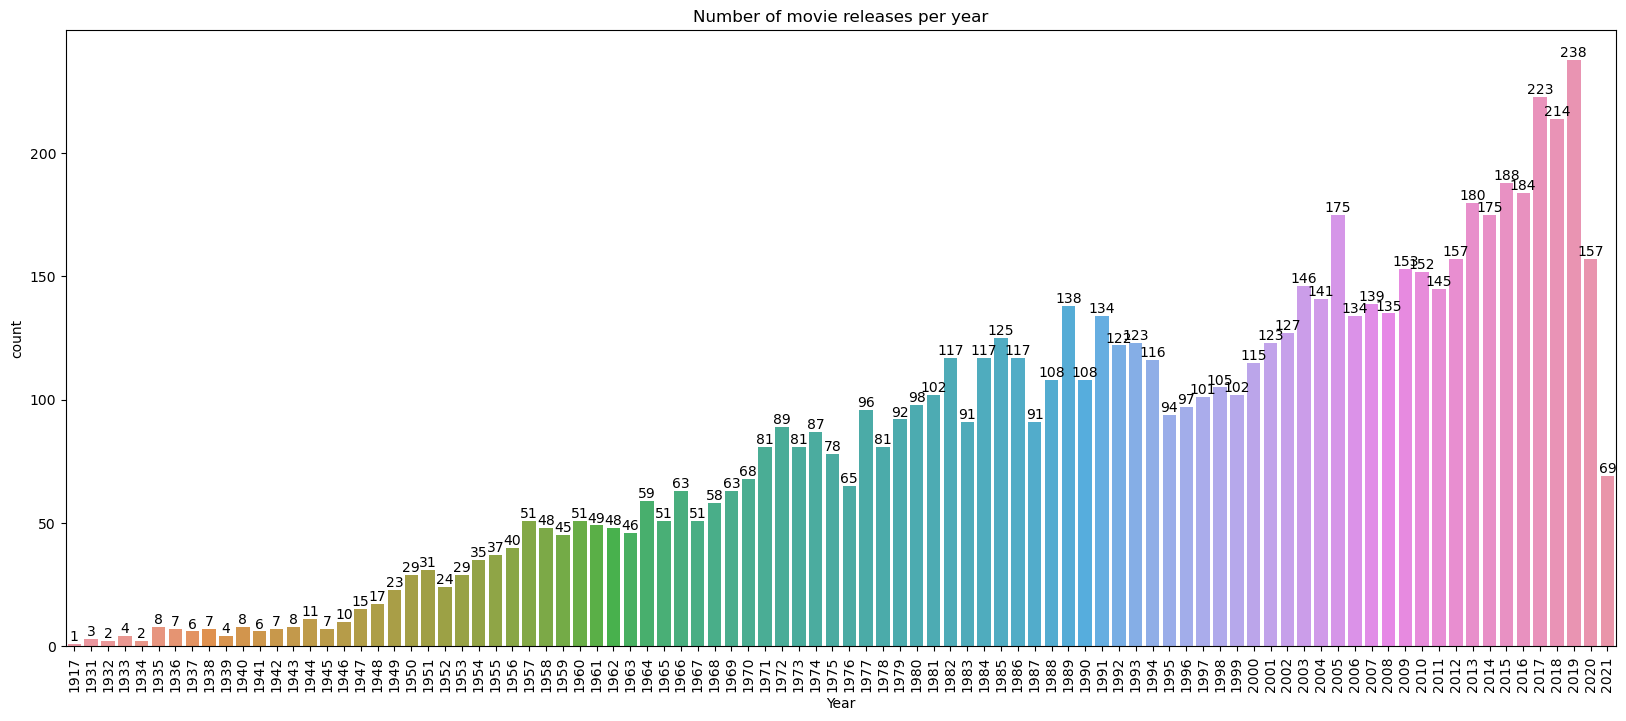

In [32]:
year_count = inp0.groupby('Year').agg({'Name':'count'}).rename(columns ={'Name':'count'}).\
                                           sort_values(by = 'count',ascending = False).reset_index()

plt.figure(figsize=(20,8))
res =sns.barplot(data= year_count , x='Year', y='count')
res.bar_label(res.containers[0])
plt.xticks(rotation= 90)
plt.title('Number of movie releases per year')
plt.show()

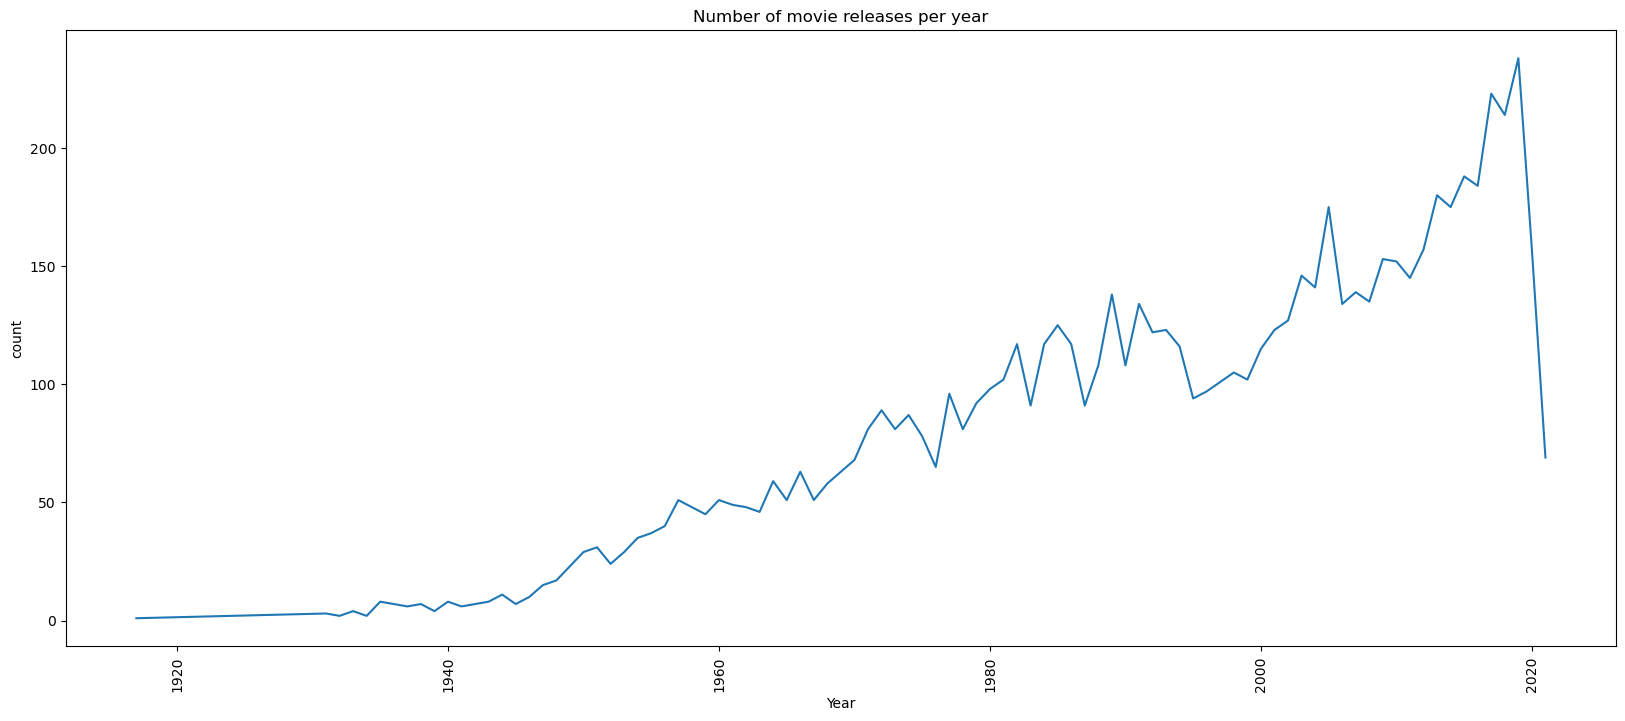

In [33]:
plt.figure(figsize=(20,8))
res =sns.lineplot(data= year_count , x='Year', y='count')
plt.xticks(rotation= 90)
plt.title('Number of movie releases per year')
plt.show()

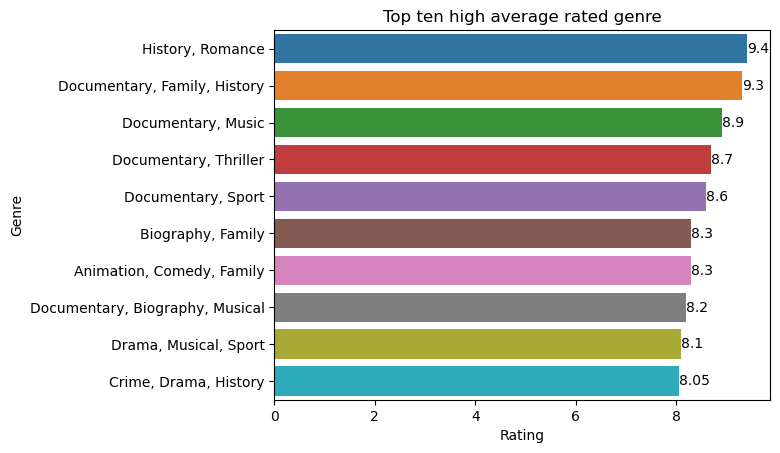

In [34]:
genre_rate = inp0.groupby('Genre').agg({'Rating':'mean'}).sort_values(by = 'Rating',ascending= False)\
                                                                             .reset_index().head(10)
res  =  sns.barplot(data= genre_rate ,x="Rating" ,y="Genre")
res.bar_label(res.containers[0])
plt.title('Top ten high average rated genre')
plt.show()

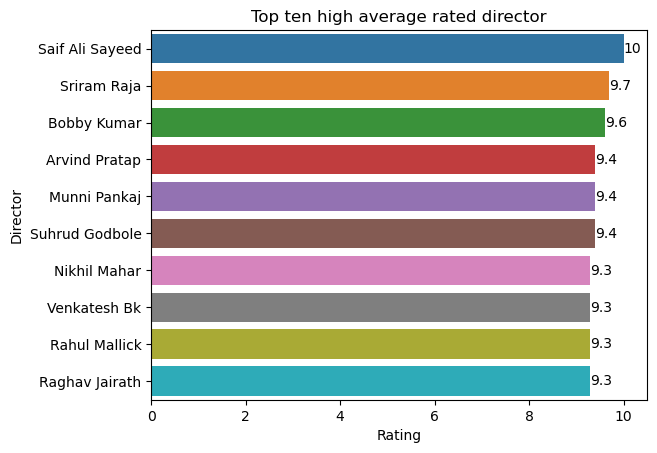

In [35]:
director_rate = inp0.groupby('Director').agg({'Rating':'mean'}).sort_values(by = 'Rating',ascending= False)\
                                                                             .reset_index().head(10)
res  =  sns.barplot(data= director_rate ,x="Rating" ,y="Director")
res.bar_label(res.containers[0])
plt.title('Top ten high average rated director')
plt.show()

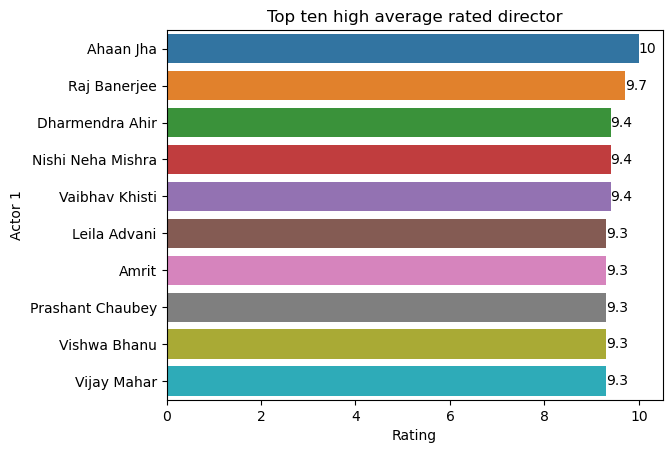

In [36]:
Actor1_rate = inp0.groupby('Actor 1').agg({'Rating':'mean'}).sort_values(by = 'Rating',ascending= False)\
                                                                             .reset_index().head(10)
res  =  sns.barplot(data= Actor1_rate ,x="Rating" ,y="Actor 1")
res.bar_label(res.containers[0])
plt.title('Top ten high average rated director')
plt.show()

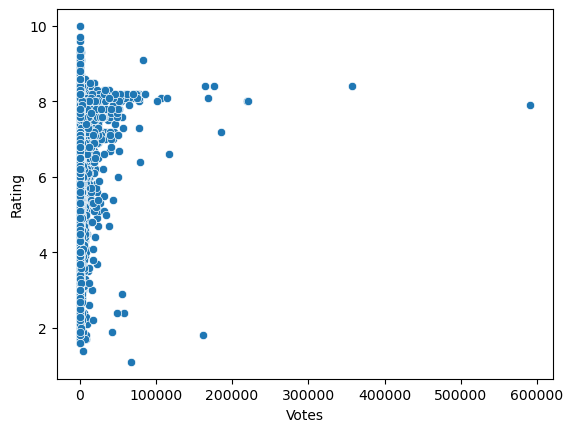

In [37]:
sns.scatterplot( data= inp0 , x= "Votes" , y="Rating")
plt.show()

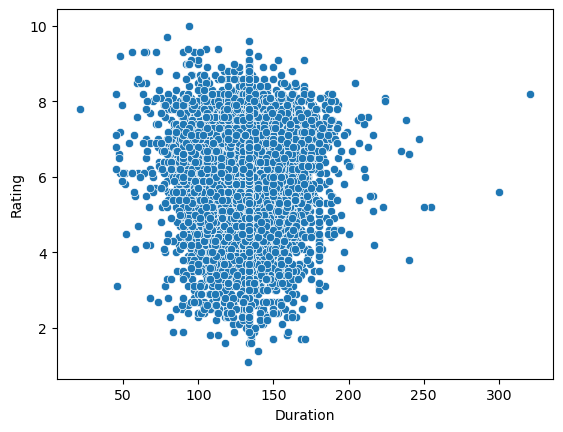

In [38]:
sns.scatterplot( data= inp0 , x= "Duration" , y="Rating")
plt.show()

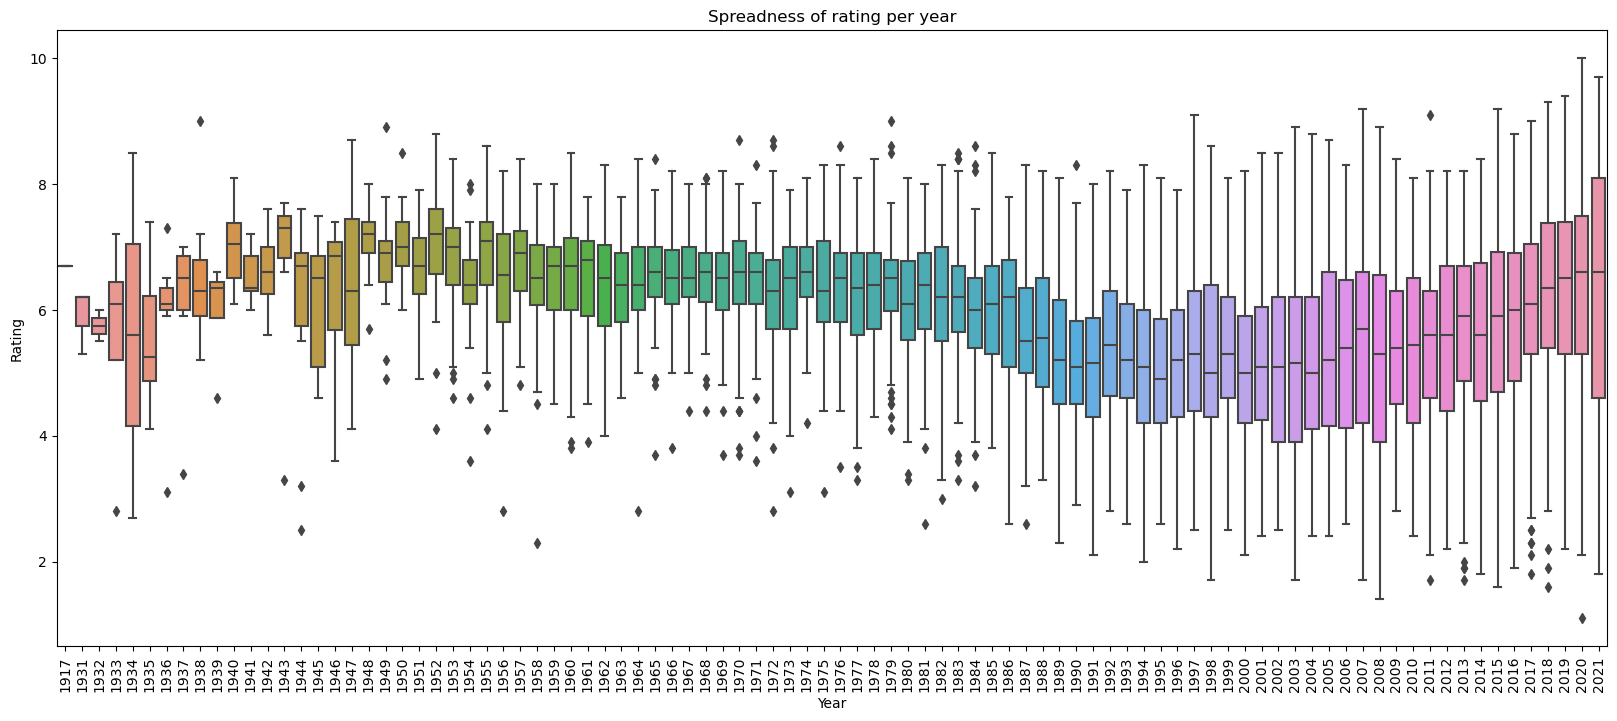

In [39]:
plt.figure(figsize=(20,8))
sns.boxplot(data=inp0, x='Year', y='Rating')
plt.title('Spreadness of rating per year')
plt.xticks(rotation=90)
plt.show()

In [40]:
inp1 = inp0.drop(["Name"] , axis=1)

In [41]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7558 entries, 1 to 15508
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      7558 non-null   int32  
 1   Duration  7558 non-null   float64
 2   Genre     7558 non-null   object 
 3   Rating    7558 non-null   float64
 4   Votes     7558 non-null   int32  
 5   Director  7558 non-null   object 
 6   Actor 1   7558 non-null   object 
 7   Actor 2   7558 non-null   object 
 8   Actor 3   7558 non-null   object 
dtypes: float64(2), int32(2), object(5)
memory usage: 531.4+ KB


In [42]:
inp1

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109.000000,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,2019,110.000000,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,1997,147.000000,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,2005,142.000000,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,2012,82.000000,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...
15501,1992,133.439124,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,1989,125.000000,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,1988,133.439124,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,1999,129.000000,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [43]:
actor_1_encoding = inp1.groupby("Actor 1").agg({"Rating": "mean"}).to_dict()
actor_2_encoding = inp1.groupby("Actor 2").agg({"Rating": "mean"}).to_dict()
actor_3_encoding = inp1.groupby("Actor 3").agg({"Rating": "mean"}).to_dict()
director_encoding = inp1.groupby("Director").agg({"Rating": "mean"}).to_dict()
genre_encoding = inp1.groupby("Genre").agg({"Rating": "mean"}).to_dict()

In [44]:
inp1["actor_1_encoded"]   = round(inp1["Actor 1"].map(actor_1_encoding["Rating"]),1)
inp1["actor_2_encoded"]   = round(inp1["Actor 2"].map(actor_2_encoding["Rating"]),1)
inp1["actor_3_encoded"]   = round(inp1["Actor 3"].map(actor_3_encoding["Rating"]),1)
inp1["director_encoded"]   = round(inp1["Director"].map(director_encoding["Rating"]),1)
inp1["genre_encoded"]   = round(inp1["Genre"].map(genre_encoding["Rating"]),1)

In [45]:
inp1.drop(["Director" ,"Actor 1" ,"Actor 2" ,"Actor 3" , "Genre"] , axis=1  , inplace=True)

In [46]:
inp1

,Year,Duration,Rating,Votes,actor_1_encoded,actor_2_encoded,actor_3_encoded,director_encoded,genre_encoded
1,2019,109.000000,7.0,8,6.8,7.0,7.0,7.0,6.3
3,2019,110.000000,4.4,35,5.4,4.4,4.4,4.4,5.7
5,1997,147.000000,4.7,827,4.8,5.8,5.8,5.4,6.2
6,2005,142.000000,7.4,1086,5.3,6.0,6.5,7.5,6.8
8,2012,82.000000,5.6,326,5.6,5.9,5.6,5.6,5.5
...,...,...,...,...,...,...,...,...,...
15501,1992,133.439124,5.3,135,5.7,6.1,4.9,5.6,5.6
15503,1989,125.000000,5.8,44,6.3,5.8,5.8,5.9,5.6
15504,1988,133.439124,4.6,11,6.0,3.7,4.6,4.1,5.0
15505,1999,129.000000,4.5,655,5.5,4.6,5.6,5.2,5.5


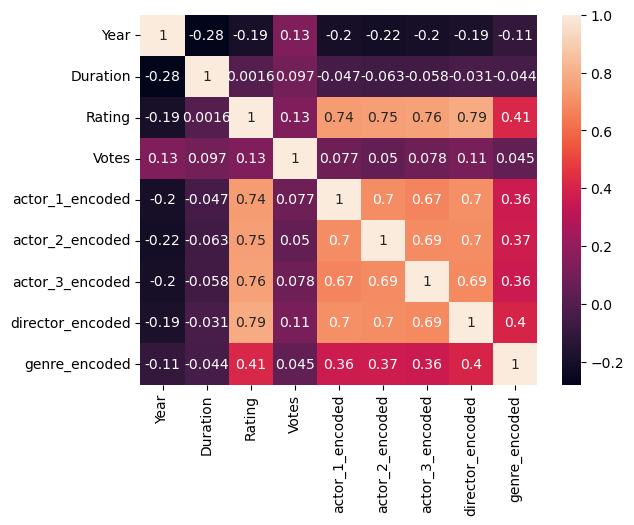

In [47]:
sns.heatmap(inp1.corr(), annot= True )
plt.show()

In [48]:
X = inp1.drop("Rating", axis=1)
y = inp1["Rating"]

In [49]:
X.head()

,Year,Duration,Votes,actor_1_encoded,actor_2_encoded,actor_3_encoded,director_encoded,genre_encoded
1,2019,109.0,8,6.8,7.0,7.0,7.0,6.3
3,2019,110.0,35,5.4,4.4,4.4,4.4,5.7
5,1997,147.0,827,4.8,5.8,5.8,5.4,6.2
6,2005,142.0,1086,5.3,6.0,6.5,7.5,6.8
8,2012,82.0,326,5.6,5.9,5.6,5.6,5.5


In [50]:
y.head()

1    7.0
3    4.4
5    4.7
6    7.4
8    5.6
Name: Rating, dtype: float64

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import  DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor


from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [54]:
y_pred_lr =lr.predict(X_test)

In [57]:
print('R^2: ', r2_score(y_test, y_pred_lr))
print('MAE: ',mean_absolute_error(y_test, y_pred_lr))
print('MSE: ', mean_squared_error(y_test, y_pred_lr))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred_lr)))

R^2:  0.7580529126852418
MAE:  0.49839952268295423
MSE:  0.4482886095535748
RMSE:  0.6695435830127676


In [58]:
results = pd.DataFrame({'actual': y_test,
                        'predicted': y_pred_lr.ravel(),
                        'residual': y_test - y_pred_lr}
                      )
results.head()

,actual,predicted,residual
6241,7.4,6.617484,0.782516
3321,4.9,5.485182,-0.585182
6117,6.5,6.324062,0.175938
5975,5.7,5.552979,0.147021
6653,7.0,6.973330,0.026670


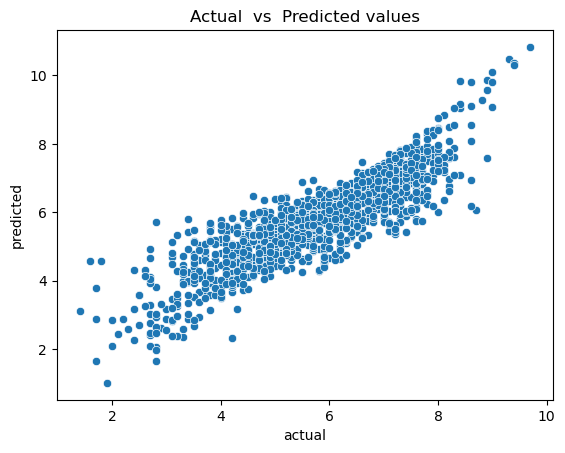

In [59]:
sns.scatterplot( x = results["actual"] , y= results["predicted"])
plt.title("Actual  vs  Predicted values")
plt.show()

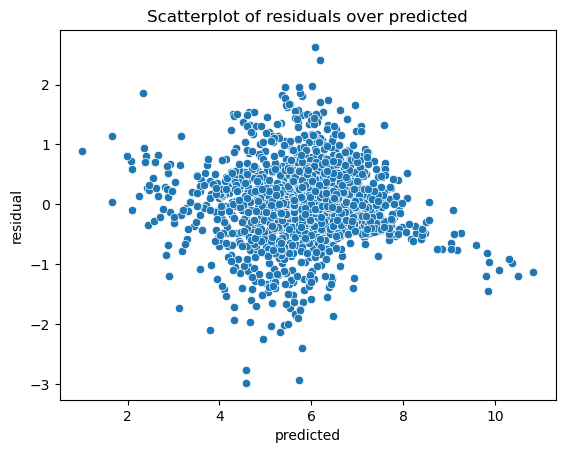

In [62]:
sns.scatterplot( x = results["predicted"] , y= results["residual"])
plt.title('Scatterplot of residuals over predicted')
plt.show()

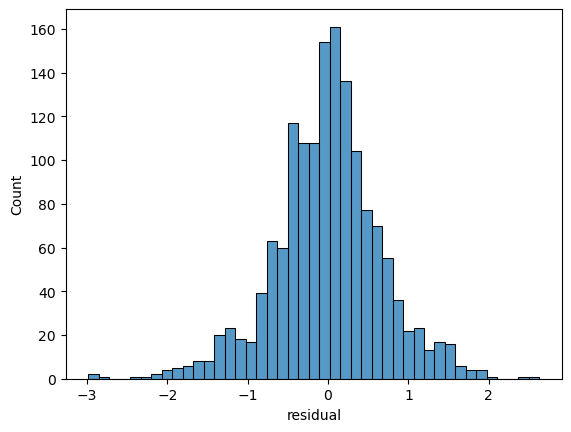

In [64]:
sns.histplot(results["residual"])
plt.show()

In [69]:
coefficients = pd.DataFrame(lr.coef_ , index=X.columns).T_

,Year,Duration,Votes,actor_1_encoded,actor_2_encoded,actor_3_encoded,director_encoded,genre_encoded
0,0.001163,0.003416,0.000005,0.246797,0.271906,0.337149,0.410225,0.136947


In [90]:
tree = DecisionTreeRegressor(random_state=0)
param_grid = {"max_depth" : [None , 10 , 20 , 30]} 
grid_search_tree  = GridSearchCV(tree , param_grid , cv=5 ,scoring= "r2")
grid_search_tree.fit(X_train ,y_train)
grid_search_tree.best_params_

{'max_depth': 10}

In [91]:
y_pred_tree = grid_search_tree.predict(X_test)

In [92]:
print('R^2: ', r2_score(y_test, y_pred_tree))
print('MAE: ',mean_absolute_error(y_test, y_pred_tree))
print('MSE: ', mean_squared_error(y_test, y_pred_tree))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred_tree)))

R^2:  0.707626058940163
MAE:  0.5106472740736313
MSE:  0.5417213695856643
RMSE:  0.7360172345710828
